In [1]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris()
# load_iris returns a sklearn.Bunch object. 
# See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# adding new columns to dataframes is easy
iris_df['Species'] = iris.target
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


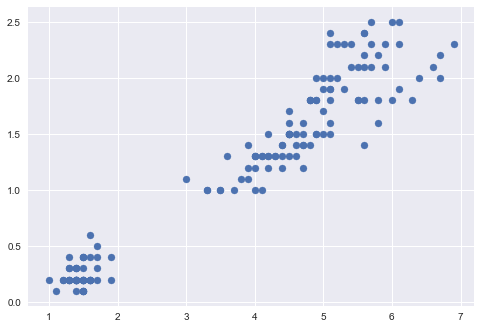

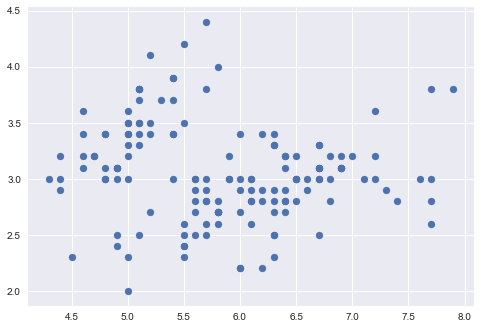

In [4]:
# optional - set the style of all matplotlib figures following this line
# preset styles: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn')

plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.show()
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.show()

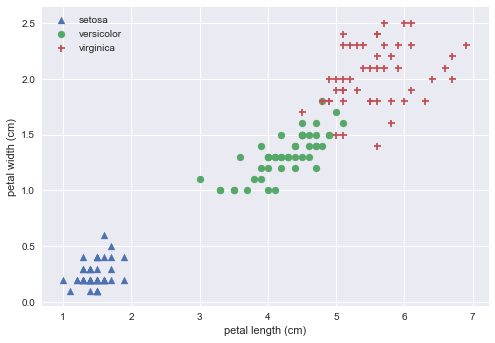

In [5]:
x_col = iris_df.columns[2] # 'petal length (cm)'
y_col = iris_df.columns[3] # 'petal width (cm)'

# selection by callable. 
# See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-callable
plt.scatter(iris_df.loc[lambda df: df.Species==0, x_col], 
            iris_df.loc[lambda df: df.Species==0, y_col],
            marker='^')
plt.scatter(iris_df.loc[lambda df: df.Species==1, x_col], 
            iris_df.loc[lambda df: df.Species==1, y_col],
            marker='o')
plt.scatter(iris_df.loc[lambda df: df.Species==2, x_col], 
            iris_df.loc[lambda df: df.Species==2, y_col],
            marker='+')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(iris.target_names)
plt.show()

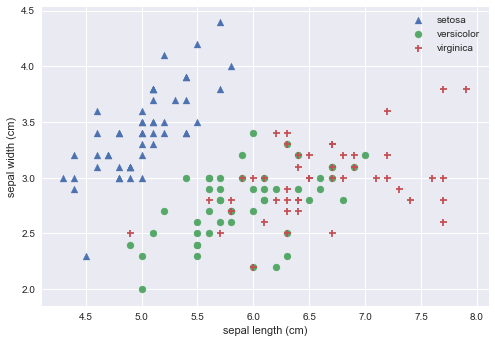

In [6]:
x_col = iris_df.columns[0] # 'sepal length (cm)'
y_col = iris_df.columns[1] # 'sepal width (cm)'

# selection by callable. 
# See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-callable
plt.scatter(iris_df.loc[lambda df: df.Species==0, x_col], 
            iris_df.loc[lambda df: df.Species==0, y_col],
            marker='^')
plt.scatter(iris_df.loc[lambda df: df.Species==1, x_col], 
            iris_df.loc[lambda df: df.Species==1, y_col],
            marker='o')
plt.scatter(iris_df.loc[lambda df: df.Species==2, x_col], 
            iris_df.loc[lambda df: df.Species==2, y_col],
            marker='+')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(iris.target_names)
plt.show()

In [7]:
X = iris.data
y = iris.target

log_reg = LogisticRegression()
log_reg.fit(X,y)
print('score: ', log_reg.score(X,y))

score:  0.96


In [8]:
pred = log_reg.predict(X)
confusion_matrix(y,pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)